In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random
import torch
from scipy.spatial import distance

In [2]:
def K(x,h):
    return (1/np.sqrt(2*np.pi*h))*np.exp((-x**2)/(2*h))
def f_hat(x,h):
    return np.array([K(x-xi,h) for xi in data ]).mean()

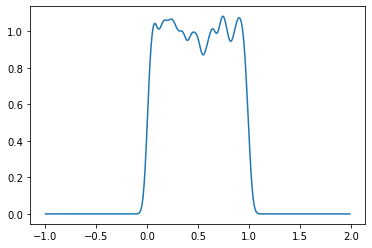

In [3]:
data=np.random.uniform(0,1,1000)
h=0.001
f=[f_hat(xi/100,h) for xi in range(-100,200) ]
plt.plot([xi/100 for xi in range(-100,200)],f)

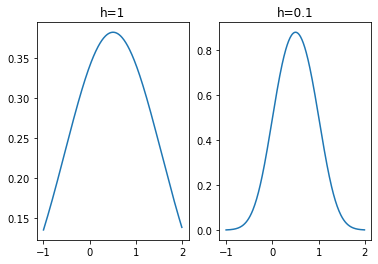

In [63]:
data=np.random.uniform(0,1,1000)
h=[1,0.1,0.01,0.001,0.0001,0.00001]
f=[]
x=[xi/100 for xi in range(-100,200)]
for i in h:
    f.append([f_hat(xi,i) for xi in x ])

    
fig= plt.figure()
for i in range(2):
    fig.add_subplot(1,2, i+1)
    plt.plot(x,f[i])
    plt.title('h='+str(h[i]))
plt.show(block=True)


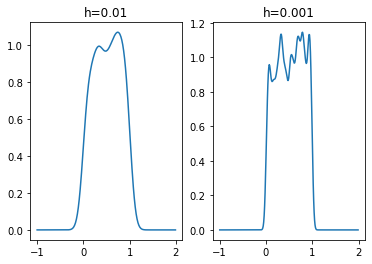

In [58]:
fig= plt.figure()
for i in range(2):
    fig.add_subplot(1,2, i+1)
    plt.plot(x,f[i+2])
    plt.title('h='+str(h[i+2]))
plt.show(block=True)

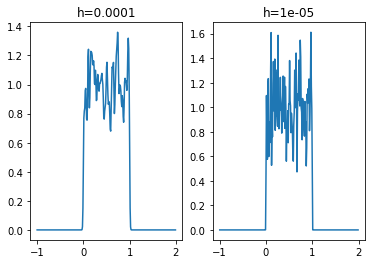

In [64]:
fig= plt.figure()
for i in range(2):
    fig.add_subplot(1,2, i+1)
    plt.plot(x,f[i+4])
    plt.title('h='+str(h[i+4]))
plt.show(block=True)

In [ ]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(out_1,cmap='gray')
plt.xlabel('Threshold')
plt.title(str(MSE1))
f.add_subplot(1,2, 2)
plt.imshow(out_2,cmap='gray')
plt.xlabel('Without Threshold')
plt.title(str(MSE2))
plt.show(block=True)
plt.show()

# Task2

In [46]:
circles= scipy.io.loadmat('/home/myron/Desktop/Moustakeidis/hw3/data32.mat')['circles']
stars= scipy.io.loadmat('/home/myron/Desktop/Moustakeidis/hw3/data32.mat')['stars']
data=np.concatenate((circles,stars),axis=0)

In [47]:
def Kernel(X,Y,h=0.01):
    axis=max(len(X.shape),len(Y.shape))-1
    return np.exp(-(1/h)*np.sum((X-Y)**2,axis=axis))
def f_hat(X,h=0.01):
    sum1=Kernel(X,stars,h)@a
    sum2=Kernel(X,circles,h)@b
    return sum1+sum2

In [48]:
def calculateParams(lamda,h):
    A=[]
    B=[]
    for iters in range(len(data)):
        row=[]
        for i in range(len(stars)):
            a= np.sum([Kernel(s,data[iters],h)*Kernel(s,stars[i],h) for s in stars]) + np.sum([Kernel(c,data[iters],h)*Kernel(c,stars[i],h) for c in circles])+lamda*Kernel(data[iters],stars[i],h)
            row.append(a)
        for i in range(len(circles)):
            a= np.sum([Kernel(s,data[iters],h)*Kernel(s,circles[i],h) for s in stars]) + np.sum([Kernel(c,data[iters],h)*Kernel(c,circles[i],h) for c in circles])+lamda*Kernel(data[iters],circles[i],h)
            row.append(a)
        A.append(row)
        B.append((np.sum([Kernel(s,data[iters],h) for s in stars])- np.sum([Kernel(c,data[iters],h) for c in circles])))
    solution=np.linalg.solve(A,B)
    
    a=solution[:21]
    b=solution[21:] 
    return a,b

In [97]:
h=0.01
l=0.1


    
a,b=calculateParams(l,h)
    
num=0
for i in circles:
    if (f_hat(i,h))>0:
        
        num+=1
for i in stars:
    if (f_hat(i,h))<0:
        num+=1
num

0

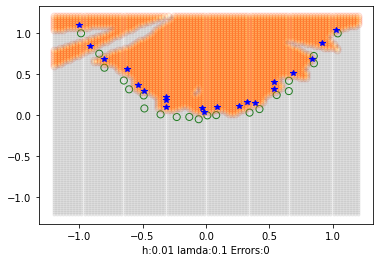

In [98]:
orange,gray=[],[]
x= np.linspace(-1.2,1.2,100)
samples=[]
for i in x:
    for j in x:
        samples.append([i,j])
samples=np.array(samples)
for i in samples:
    n=f_hat(i,h)
    if (n>0):
        orange.append(i)
    else:
        gray.append(i)
orange=np.array(orange)
gray=np.array(gray)
xo,yo=orange[:,0],orange[:,1]
xg,yg=gray[:,0],gray[:,1]
xc,xs=np.array(circles)[:,0],np.array(stars)[:,0]
yc,ys=np.array(circles)[:,1],np.array(stars)[:,1]
plt.scatter(xc, yc, s=50, facecolors='none', edgecolors='g')
plt.plot(xs,ys,'*',color='b')
plt.scatter(xo,yo,s=50,facecolors='orange',edgecolors='r',alpha=0.12)
plt.scatter(xg,yg,s=10,facecolors='gray',alpha=0.12)
plt.xlabel(f'h:{h} lamda:{l} Errors:{num}')
plt.show()

# Task3

In [7]:
data= scipy.io.loadmat('/home/myron/Desktop/Moustakeidis/hw3/data33.mat')['X']

In [8]:
dist=distance.euclidean
def Kmeans(Vectors,KM,dist):
    newCentroids=[]
    centroids=random.sample(list(Vectors),KM)    
    while(True):
        clusters={}
        for i,x in enumerate(Vectors):
            d=[dist(x,k)**2 for k in centroids]
            p=d.index(min(d))
            clusters[i]=p 
        keys = np.fromiter(clusters.keys(),dtype=np.int8)
        vals = np.fromiter(clusters.values(),dtype=np.int8)
        for i in range(KM):
            p=np.where(vals==i)
            if np.size(p)>0:
                cluster_places=keys[p]
                cluster=Vectors[cluster_places]
                new_centroid=np.mean(cluster,axis=0)
                newCentroids.append(new_centroid)
        centroids=np.reshape(centroids,(KM,Vectors.shape[1]))
        newCentroids=np.reshape(newCentroids,(KM,Vectors.shape[1]))
        if (newCentroids - centroids).all():
            break
        centroids=np.copy(newCentroids)
        newCentroids=[]
    return centroids

In [89]:
dist=distance.euclidean
data= scipy.io.loadmat('/home/myron/Desktop/Moustakeidis/hw3/data33.mat')['X']
Vectors=np.array([np.array([data[0,i],data[1,i]],dtype='float32') for i in range(200)])
e=[]
centers=[]
valid_A=Vectors[:100]
valid_B=Vectors[100:]
for m in range(500):
    out=Kmeans(Vectors,2,dist)
    centers.append(out)
    classA=[]
    classB=[]
    for vector in Vectors:
        distA=dist(vector,out[0])
        distB=dist(vector,out[1])
        if distA<distB:
            classA.append(vector)
        else:
            classB.append(vector)
    num=0
    for i in classA:
        if i  not in valid_A:
            num+=1
    for i in classB:
        if i not in valid_B:
            num+=1
    e.append(num/200)
print(min(e))
best_centers=centers[e.index(min(e))]


0.355


In [91]:
classA=[]
classB=[]
for vector in Vectors:
    distA=dist(vector,best_centers[0])
    distB=dist(vector,best_centers[1])
    if distA<distB:
        classA.append(vector)
    else:
        classB.append(vector)

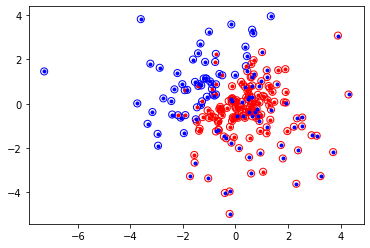

In [137]:
classA=[]
classB=[]
for vector in Vectors:
    distA=dist(vector,best_centers[0])
    distB=dist(vector,best_centers[1])
    if distA<distB:
        classA.append(vector)
    else:
        classB.append(vector)
xA,xB=np.array(classA)[:,0],np.array(classB)[:,0]
yA,yB=np.array(classA)[:,1],np.array(classB)[:,1]
vxA,vxB=np.array(valid_A)[:,0],np.array(valid_B)[:,0]
vyA,vyB=np.array(valid_A)[:,1],np.array(valid_B)[:,1]
plt.plot(vxA,vyA,'.',color='red')
plt.plot(vxB,vyB,'.',color='blue')
plt.scatter(xA, yA, s=50, facecolors='none', edgecolors='r')
plt.scatter(xB, yB, s=50, facecolors='none', edgecolors='b')
plt.show()

# Task3b

In [180]:
data= scipy.io.loadmat('/home/myron/Desktop/Moustakeidis/hw3/data33.mat')['X']
Vectors=np.array([np.array([data[0,i],data[1,i],data[0,i]**2+data[1,i]**2],dtype='float32') for i in range(200)])
e=[]
centers=[]
valid_A=Vectors[:100]
valid_B=Vectors[100:]
for m in range(50):
    out=Kmeans(Vectors,2,dist)
    centers.append(out)
    classA=[]
    classB=[]
    for vector in Vectors:
        distA=dist(vector,out[0])
        distB=dist(vector,out[1])
        if distA<distB:
            classA.append(vector)
        else:
            classB.append(vector)
    num=0
    for i in classA:
        if i  not in valid_A:
            num+=1
    for i in classB:
        if i not in valid_B:
            num+=1
    e.append(num/200)
print(min(e))
best_centers=centers[e.index(min(e))]

0.245


In [181]:
print(best_centers)

[[ 0.5223014   0.32355204  0.37748462]
 [-0.6102096   1.3426355   2.175026  ]]


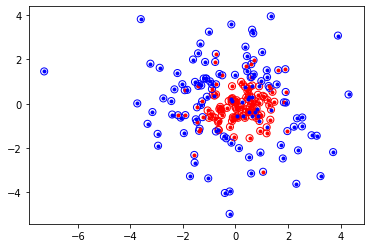

In [182]:
classA=[]
classB=[]
for vector in Vectors:
    distA=dist(vector,best_centers[0])
    distB=dist(vector,best_centers[1])
    if distA<distB:
        classA.append(vector)
    else:
        classB.append(vector)
xA,xB=np.array(classA)[:,0],np.array(classB)[:,0]
yA,yB=np.array(classA)[:,1],np.array(classB)[:,1]
vxA,vxB=np.array(valid_A)[:,0],np.array(valid_B)[:,0]
vyA,vyB=np.array(valid_A)[:,1],np.array(valid_B)[:,1]
plt.plot(vxA,vyA,'.',color='red')
plt.plot(vxB,vyB,'.',color='blue')
plt.scatter(xA, yA, s=50, facecolors='none', edgecolors='r')
plt.scatter(xB, yB, s=50, facecolors='none', edgecolors='b')
plt.show()